In [1]:
%matplotlib inline

# This notebook is for re-creating figures and statistics from the manuscript based on previously created dataframes. 

Cells are rather hideous and need some manual intervention of limiting axes, etc. to match everything up with the manuscript but the basic set-up for virtually all primary and supplementary figures is here with exceptions being for the few that occur in the analysis notebook and the start_codon_and_sd notebook.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

from bisect import bisect

In [3]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 9
matplotlib.rcParams['ytick.labelsize'] = 9
matplotlib.rcParams['axes.labelsize'] = 9
matplotlib.rcParams['axes.titlesize'] = 10

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.8'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.major.size'] = 5
# matplotlib.rcParams['axes.spines.right'] = False
# matplotlib.rcParams['axes.spines.left'] = False
# matplotlib.rcParams['axes.spines.top'] = False
# matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.weight']='ultralight'
# matplotlib.rcParams['font.sans-serif'] = ['Computer Modern Sans Serif']
matplotlib.rcParams['axes.axisbelow'] = True

# Fig 1 and its SI Fig derivatives

In [4]:
# ###Original Fig 1
file_name_modifiers = 'df_hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=None'

# ###Fig 1 with less stringent threshold
# file_name_modifiers = 'df_hyphy_Escherichia_Threshold=-20.0to-3.5_Conserved=True_NtRestriction=None'

# ###Fig 1 with more stringent threshold
# file_name_modifiers = 'df_hyphy_Escherichia_Threshold=-20.0to-5.5_Conserved=True_NtRestriction=None'

##Fig 1 with different organisms to identify locations
# file_name_modifiers = 'df_hyphy_Salmonella_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=None'
# file_name_modifiers = 'df_hyphy_Klebsiella_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=None'
# file_name_modifiers = 'df_hyphy_Yersinia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=None'



#Fig 1 true SD sequences
# file_name_modifiers = 'df_hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=None_Subset=preceding_Position_limitation=3prime'

###Fig 1 true SD sequences negative control
# file_name_modifiers = 'df_hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=None_Subset=not_preceding_Position_limitation=3prime'


In [5]:
df_raw = pd.read_csv('../Results/Dataframes/{}_all.csv'.format(file_name_modifiers))
df_ratios = pd.read_csv('../Results/Dataframes/{}_ratios.csv'.format(file_name_modifiers))
df_ratios.head()

,Actual_rats_codon,Shuffled_rats_codon,Actual_rats_trint,Shuffled_rats_trint,Actual_pvals_codon,Shuffled_pvals_codon,Actual_pvals_trint,Shuffled_pvals_trint,N_(codon),N_(trint)
0,1.091324,0.989802,1.308103,1.005947,0.000331,0.996460,3.230173e-17,0.716903,1740,1161
1,1.084689,1.012348,1.242692,0.978991,0.001148,0.926222,6.059248e-11,0.494786,1740,1161
2,1.053736,0.997164,1.289698,1.074814,0.037016,0.882994,3.978362e-16,0.115727,1740,1161
3,1.041794,0.942903,1.238942,1.020686,0.045474,0.227918,4.242962e-10,0.416608,1740,1161
4,1.079454,1.030477,1.274495,0.974273,0.001022,0.332631,2.812419e-13,0.995706,1740,1161


In [6]:
print('Median:')
print('Actual p-val (codon):', df_ratios['Actual_pvals_codon'].median())
print('Shuffled p-val (codon):', df_ratios['Shuffled_pvals_codon'].median())
print('Actual p-val (trint):', df_ratios['Actual_pvals_trint'].median())
print('Shuffled p-val (trint):', df_ratios['Shuffled_pvals_trint'].median())

print('Mean ratios (codon, trint):')
print(df_ratios['Actual_rats_codon'].mean(), df_ratios['Actual_rats_trint'].mean())

Median:
Actual p-val (codon): 0.0031883168071169246
Shuffled p-val (codon): 0.48433049373125836
Actual p-val (trint): 1.2231934714626908e-14
Shuffled p-val (trint): 0.5280711672856482
Mean ratios (codon, trint):
1.07537640753 1.27758869363


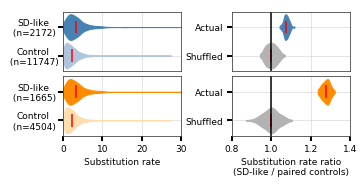

In [7]:
fig = plt.figure(figsize=(5,2.5))
ax1 = fig.add_subplot(221)
columns = ['Control\n(codon)', 'SD-like(codon)']
plot_data = [df_raw[df_raw[i].isnull()==False][i] for i in columns]
violin_parts = ax1.violinplot(plot_data, points=1000, showextrema=False, showmeans=True, widths=0.9, vert=False);
ax1.set_yticks(list(range(1,len(columns)+1)))
column_plus_n = [i.split('\n')[0]+'\n (n={})'.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]
# column_plus_n = [i.split('\n')[0]+'\n   (n={})  '.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]
# column_plus_n = [i.replace('-like', '').split('\n')[0]+'\n   (n={})  '.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]
column_plus_n = [i.replace('(codon)', '') for i in column_plus_n]
ax1.set_yticklabels(column_plus_n, ha='center')
for i, pc in enumerate(violin_parts['bodies']):
    if i == 0:
        pc.set_facecolor('lightsteelblue')
        pc.set_edgecolor('lightsteelblue')
        pc.set_alpha(1)
    if i == 1:
        pc.set_facecolor('steelblue')
        pc.set_edgecolor('steelblue')
        pc.set_alpha(1) 
violin_parts['cmeans'].set_edgecolor('r')
ax1.tick_params(axis='y', which='major', pad=25)

ax3 = fig.add_subplot(223, sharex=ax1)
columns = ['Control\n(context)', 'SD-like(trint)']
plot_data = [df_raw[df_raw[i].isnull()==False][i] for i in columns]
violin_parts = ax3.violinplot(plot_data, points=1000, showextrema=False, showmeans=True, widths=0.9, vert=False);
ax3.set_yticks(list(range(1,len(columns)+1)))
column_plus_n = [i.split('\n')[0]+'\n (n={})'.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]

# column_plus_n = [i.replace('-like', '').split('\n')[0]+'\n (n={})'.format(len(df_raw[df_raw[i].isnull()==False])) for i in columns]

column_plus_n = [i.replace('(trint)', '') for i in column_plus_n]
ax3.set_yticklabels(column_plus_n, ha='center')
ax3.set_xlabel('Substitution rate')
for i, pc in enumerate(violin_parts['bodies']):
    if i == 0:
        pc.set_facecolor('navajowhite')
        pc.set_edgecolor('navajowhite')
        pc.set_alpha(1)
    if i == 1:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(1) 
violin_parts['cmeans'].set_edgecolor('r')

ax3.tick_params(axis='y', which='major', pad=25)
ax3.set_xlim(0, 30)



##################################
##################################
##################################
ax2 = fig.add_subplot(222)
violin_parts = ax2.violinplot([df_ratios['Shuffled_rats_codon'], df_ratios['Actual_rats_codon']],\
                              widths=0.9, showextrema=False, showmeans=True, vert=False)
for i, pc in enumerate(violin_parts['bodies']):
    if i==0:
        pc.set_facecolor('0.7')
        pc.set_edgecolor('0.7')
        pc.set_alpha(1)   
    if i==1:
        pc.set_facecolor('steelblue')
        pc.set_edgecolor('steelblue')
        pc.set_alpha(1)
violin_parts['cmeans'].set_edgecolor('r')
ax2.axvline(1, c='k')
ax2.set_yticks(list(range(1,len(columns)+1)))
ax2.set_yticklabels(['Shuffled', 'Actual', ], ha='right')



ax4 = fig.add_subplot(224, sharex=ax2)
violin_parts = ax4.violinplot([df_ratios['Shuffled_rats_trint'], df_ratios['Actual_rats_trint']],\
                              widths=0.9, showextrema=False, showmeans=True, vert=False)
for i, pc in enumerate(violin_parts['bodies']):
    if i==0:
        pc.set_facecolor('0.7')
        pc.set_edgecolor('0.7')
        pc.set_alpha(1)   
    if i==1:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(1)
violin_parts['cmeans'].set_edgecolor('r')
ax4.axvline(1, c='k')
ax4.set_yticks(list(range(1,len(columns)+1)))
ax4.set_yticklabels(['Shuffled', 'Actual', ], ha='right')


ax4.set_xlabel('Substitution rate ratio\n(SD-like / paired controls)')
# ax4.set_xlabel('Substitution rate ratio\n(SD / paired controls)')

plt.setp(ax1.get_xticklabels(), visible=False);
plt.setp(ax2.get_xticklabels(), visible=False);

ax2.set_xlim(0.8, 1.4)

for line in ax1.xaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)
for line in ax2.xaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)
plt.tight_layout(pad=0.5, w_pad=-0.1, h_pad=-0.2)

# plt.savefig('../Results/Figures/fig_{}.pdf'.format(file_name_modifiers))

# Fig 2 and its derivatives

In [ ]:
###Original Fig 2
file_name_modifiers = 'hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=XXXXX'

###Fig 2 with less stringent threshold
# file_name_modifiers = 'hyphy_Escherichia_Threshold=-20.0to-3.5_Conserved=True_NtRestriction=XXXXX'

###Fig 2 with more stringent threshold
file_name_modifiers = 'hyphy_Escherichia_Threshold=-20.0to-5.5_Conserved=True_NtRestriction=XXXXX'

###Fig 2 on only weak sites
# file_name_modifiers = 'hyphy_Escherichia_Threshold=-4.5to-3.5_Conserved=True_NtRestriction=XXXXX'

###Fig 2 with Yersinia as reference species
# file_name_modifiers = 'hyphy_Yersinia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=XXXXX'


df_all = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', 'None')))
df_strongest = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', '0')))
df_strong = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', '1')))
df_weak = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', '2')))
df_weakest = pd.read_csv('../Results/Dataframes/df_{}_ratios.csv'.format(file_name_modifiers.replace('XXXXX', '3')))

In [ ]:
dfs = [df_all, df_strongest, df_strong, df_weak, df_weakest]

for df in dfs:
    print('######################################################################')
    print('Actual (shuffled) median p-val (codon):', df['Actual_pvals_codon'].median(), '(',\
          df['Shuffled_pvals_codon'].median(), ')')
    print('Actual (shuffled) median p-val (trint):', df['Actual_pvals_trint'].median(), '(',\
          df['Shuffled_pvals_trint'].median(), ')')

In [ ]:
positions = [1.5, 3, 4.5, 6, 7.5]

fig = plt.figure(figsize=(4.5,2.25))
ax1 = fig.add_subplot(121)
violin_parts = ax1.violinplot([i['Actual_rats_codon'] for i in dfs], positions=positions,\
                              widths=1.2, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor('steelblue')
    pc.set_edgecolor('steelblue')
    pc.set_alpha(0.85)   

violin_parts['cmeans'].set_edgecolor('r')
ax1.axhline(1, c='k')
ax1.set_xticks(positions)
ax1.set_xticklabels(['All', '0', '1', '2', '3'], ha='center')
ax1.set_ylabel('Substitution rate ratio')
ax1.set_xlabel('Number of mutations\n resulting in a stronger\n SD-like seq', position=(0.6,1))




ax2 = fig.add_subplot(122, sharey=ax1)
violin_parts = ax2.violinplot([i['Actual_rats_trint'] for i in dfs], positions=positions,\
                              widths=1.2, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor('darkorange')
    pc.set_edgecolor('darkorange')
    pc.set_alpha(0.85)
    
violin_parts['cmeans'].set_edgecolor('r')
ax2.axhline(1, c='k')
ax2.set_xticks(positions)
ax2.set_xticklabels(['All', '0', '1', '2', '3'], ha='center')
ax2.set_xlabel('Number of mutations\n resulting in a stronger\n SD-like seq', position=(0.6,1))

ax1.set_ylim(0.55, 1.4)

plt.setp(ax2.get_yticklabels(), visible=False);
for line in ax2.yaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)


plt.tight_layout()
plt.savefig('../Results/Figures/{}_weakest_vs_strongest_ratios.pdf'.format(file_name_modifiers))

# Fig 3

In [33]:
###Fig 3 in paper
# basic_file_name_structure = '../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20to-4.5_Conserved=True_NtRestriction=0_Subset=XXXXX_ratios.csv'
# file_name_modifiers = 'hyphy_Escherichia_Threshold=-20to-4.5_Conserved=True_NtRestriction=0_Subset=XXXXX'

basic_file_name_structure = '../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20to-4.5_Conserved=True_NtRestriction=0_Subset=XXXXX_MIDDLELENGTHS_ratios.csv'
file_name_modifiers = 'hyphy_Escherichia_Threshold=-20to-4.5_Conserved=True_NtRestriction=0_Subset=XXXXX_MIDDLELENGTHS'

###Using weak sites
# basic_file_name_structure = '../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20to-4.5_Conserved=True_NtRestriction=3_Subset=XXXXX_ratios.csv'
# file_name_modifiers = 'hyphy_Escherichia_Threshold=-20to-4.5_Conserved=True_NtRestriction=3_Subset=XXXXX'


###Fig 3 in paper with less stringent threshold
# basic_file_name_structure = '../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20to-3.5_Conserved=True_NtRestriction=0_Subset=XXXXX_ratios.csv'
# file_name_modifiers = 'hyphy_Escherichia_Threshold=-20to-3.5_Conserved=True_NtRestriction=0_Subset=XXXXX'

###Fig 3 in paper with more stringent threshold
# basic_file_name_structure = '../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20to-5.5_Conserved=True_NtRestriction=0_Subset=XXXXX_ratios.csv'
# file_name_modifiers = 'hyphy_Escherichia_Threshold=-20to-5.5_Conserved=True_NtRestriction=0_Subset=XXXXX'


###Fig 3 in paper with Y. pestis location identifiers
# basic_file_name_structure = '../Results/Dataframes/df_hyphy_Yersinia_Threshold=-20to-4.5_Conserved=True_NtRestriction=0_Subset=XXXXX_ratios.csv'
# file_name_modifiers = 'hyphy_Yersinia_Threshold=-20to-4.5_Conserved=True_NtRestriction=0_Subset=XXXXX'



df_lowest = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'lowest'))
df_low = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'low'))
df_med = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'mid'))
df_high = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'high'))
df_highest = pd.read_csv(basic_file_name_structure.replace('XXXXX', 'highest'))

In [34]:
df_highest.head()

,Actual_rats_codon,Shuffled_rats_codon,Actual_rats_trint,Shuffled_rats_trint,Actual_pvals_codon,Shuffled_pvals_codon,Actual_pvals_trint,Shuffled_pvals_trint,N_(codon),N_(trint)
0,1.307879,1.131724,1.633195,1.006515,0.000413,0.313980,3.115087e-06,0.856180,148,101
1,1.337695,1.005233,1.481002,1.146837,0.000015,0.465795,1.703326e-05,0.300705,148,101
2,1.302289,0.988700,1.715458,0.955443,0.000392,0.741963,9.409403e-07,0.653531,148,101
3,1.376682,0.960679,1.698444,1.049581,0.000100,0.724669,1.769608e-07,0.397991,148,101
4,1.311845,0.972389,1.638255,1.081037,0.000234,0.543968,1.105391e-05,0.361259,148,101


In [35]:
df_list = [df_lowest, df_low, df_med, df_high, df_highest]
to_plot_codon = [list(temp_df['Actual_rats_codon']) for temp_df in df_list]
to_plot_trint = [list(temp_df['Actual_rats_trint']) for temp_df in df_list]

for df in df_list:
    print('######################################################################')
    print('Actual (shuffled) median p-val (codon):', df['Actual_pvals_codon'].median(), '(',\
          df['Shuffled_pvals_codon'].median(), ')')
    print('Actual (shuffled) median p-val (trint):', df['Actual_pvals_trint'].median(), '(',\
          df['Shuffled_pvals_trint'].median(), ')')

######################################################################
Actual (shuffled) median p-val (codon): 0.015615174526587916 ( 0.6046207024458066 )
Actual (shuffled) median p-val (trint): 0.0030467407070881047 ( 0.5128429254704854 )
######################################################################
Actual (shuffled) median p-val (codon): 0.0068351962083803295 ( 0.4792673841407191 )
Actual (shuffled) median p-val (trint): 0.00018931818238931449 ( 0.5402203416512339 )
######################################################################
Actual (shuffled) median p-val (codon): 0.010320196392054493 ( 0.5467677364027961 )
Actual (shuffled) median p-val (trint): 1.533971169035112e-05 ( 0.43206785429004557 )
######################################################################
Actual (shuffled) median p-val (codon): 0.010607099143710916 ( 0.48238384701354775 )
Actual (shuffled) median p-val (trint): 0.0010278513449038448 ( 0.4820990116330057 )
####################################

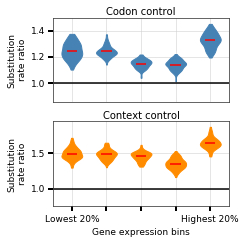

In [36]:
cols = ['Codon_rats_lowest', 'Codon_rats_low', 'Codon_rats_med', 'Codon_rats_high', 'Codon_rats_highest']

fig = plt.figure(figsize=(3.5,3.5))
ax1 = fig.add_subplot(211)
violin_parts = ax1.violinplot(to_plot_codon, positions=[1.5, 3, 4.5, 6, 7.5],\
                              widths=0.9, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor('steelblue')
    pc.set_edgecolor('steelblue')
    pc.set_alpha(1)   

violin_parts['cmeans'].set_edgecolor('r')
ax1.axhline(1, c='k')
ax1.set_xticks([1.5, 3, 4.5, 6, 7.5])
ax1.set_xticklabels(['Lowest 20%', '', '', '', 'Highest 20%'], ha='center')
ax1.set_ylabel('Substitution\nrate ratio')
# ax1.set_ylim(0.95, 1.45)
ax1.set_ylim(0.85, 1.5)
# ax1.set_ylim(0.5, 1.75)
# ax1.set_ylim(0.4, 1.3)


ax2 = fig.add_subplot(212, sharex=ax1)
violin_parts = ax2.violinplot(to_plot_trint, positions=[1.5, 3, 4.5, 6, 7.5],\
                              widths=0.9, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor('darkorange')
    pc.set_edgecolor('darkorange')
    pc.set_alpha(1)
violin_parts['cmeans'].set_edgecolor('r')
ax2.axhline(1, c='k')
ax2.set_xticks([1.5, 3, 4.5, 6, 7.5])
ax2.set_xticklabels(['Lowest 20%', '', '', '', 'Highest 20%'], ha='center')
ax2.set_ylabel('Substitution\nrate ratio')
ax2.set_xlabel('Gene expression bins')


plt.setp(ax1.get_xticklabels(), visible=False);
for line in ax1.xaxis.get_ticklines():
    line.set_markersize(0)
    line.set_markeredgewidth(0)

ax1.set_title('Codon control', y=0.96)
ax2.set_title('Context control', y=0.96)
# ax2.set_ylim(0.95, 1.9)
ax2.set_ylim(0.75, 1.95)
# ax2.set_ylim(0.5, 1.85)
# ax2.set_ylim(0.4, 1.3)
plt.tight_layout(h_pad=0.5)

plt.savefig('../Results/Figures/{}_expression_bins.pdf'.format(file_name_modifiers))

# Protein domain analysis

In [ ]:
# df_all_strong = pd.read_csv('../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=0_ratios.csv')
# df_postdomain_strong = pd.read_csv('../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=0_Position_limitation=POST_DOMAIN_ALL_ratios.csv')
# all_dfs = [df_all_strong, df_postdomain_strong]
# title = 'Locally strong sites'
# save_file = 'domain_strong'

df_all_weak = pd.read_csv('../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=3_ratios.csv')
df_postdomain_weak = pd.read_csv('../Results/Dataframes/df_hyphy_Escherichia_Threshold=-20.0to-4.5_Conserved=True_NtRestriction=3_Position_limitation=POST_DOMAIN_ALL_ratios.csv')
all_dfs = [df_all_weak, df_postdomain_weak]
title = 'Locally weak sites'
save_file = 'domain_weak'

for df in all_dfs:
    print('######################################################################')
    print('Actual (shuffled) median p-val (codon):', df['Actual_pvals_codon'].median(), '(',\
          df['Shuffled_pvals_codon'].median(), ')')
    print('Actual (shuffled) median p-val (trint):', df['Actual_pvals_trint'].median(), '(',\
          df['Shuffled_pvals_trint'].median(), ')')



In [ ]:
fig = plt.figure(figsize=(3.5,2))
ax1 = fig.add_subplot(111)
violin_parts = ax1.violinplot([temp_df['Actual_rats_codon'] for temp_df in all_dfs]+[temp_df['Actual_rats_trint'] for temp_df in all_dfs], positions=[1.5, 3, 4.5, 6],\
                              widths=0.9, showextrema=False, showmeans=True, vert=True)
for i, pc in enumerate(violin_parts['bodies']):
    if i in [0, 1]:
        pc.set_facecolor('steelblue')
        pc.set_edgecolor('steelblue')
        pc.set_alpha(1)   
    elif i in [2,3]:
        pc.set_facecolor('darkorange')
        pc.set_edgecolor('darkorange')
        pc.set_alpha(1) 

        
violin_parts['cmeans'].set_edgecolor('r')
ax1.axhline(1, c='k')
ax1.set_xticks([1.5, 3, 4.5, 6])
ax1.set_xticklabels(['All', 'Post\nDomain', 'All', 'Post\nDomain'])
ax1.set_ylabel('Substitution\nrate ratio')

ax1.set_ylim(0.6, 1.25)
ax1.set_title(title)
plt.tight_layout()
plt.savefig('../Results/Figures/{}.pdf'.format(save_file))